#### 확률적 경사하강법 SGD
```
모델의 오차(비용) 를 최소화하는 파라미터(가중치)를 찾기위한 최적화 방법
현재위치 : 모델의 현재 파라미터
산의 높이 : 모델의 오차
기울기 : 반대방향으로 가야 가장 빠르게 낮아진다
```
```
배치경사 하강법 : 산 전체의 지형을 모두 조사해서 가장 가파른 방향을 찾아 한걸음씩 내려가는 구조
(한번에 전체 데이터를 다 쓴다)
장점 : 기울기 계산이 매우 정확
단점 : 데이터가 많으면 느리고 리소스를 많이 사용

확률적 경사하강법 : 무작위로 한 지점만 보고 그곳의 경사를 따라서 내려간다
SGD 는 무작위로 샘플 한개의 오차를 계산하고 파라미터를 업데이트 이 과정을 모든 데이터에 대해서 
빠르게 반복
무작위성의 장점 : 지역최저점(local minimum)에 갇히지 않고 더 낮은 전역 최저점(global minimum)
```

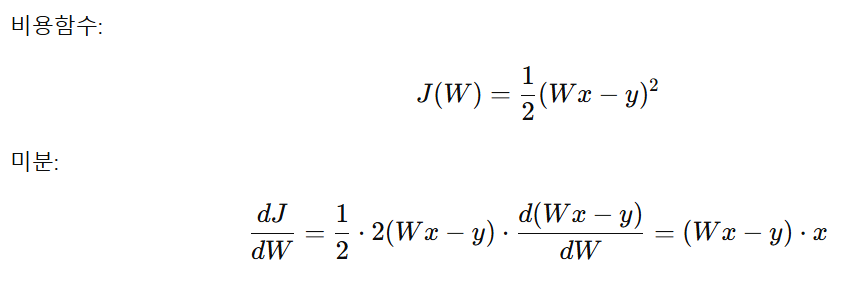

```
W-new : 새로운 가중치
W-old : 현재 가중치
n(네타) : 학습률 learning rate 너무 크면 최저점을 지나고 너무 작으면 학습이 매우 느려진다
나블라 : 기울기 Gradient
J : 오차함수(비용함수) 현재 가중치 W-old에서 하나의 데이터샘플에 대한 오차

새로운 가중치 = 현재가중치 오차를 키우는 기울기 방향과 반대로 학습률 만큼 이동한 값
```

미분 
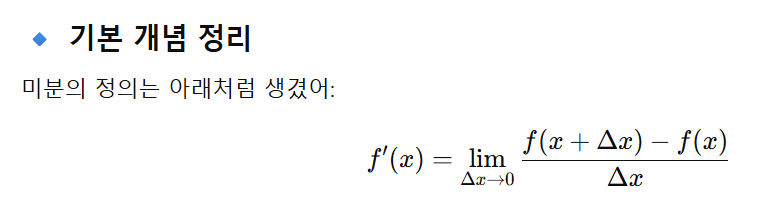
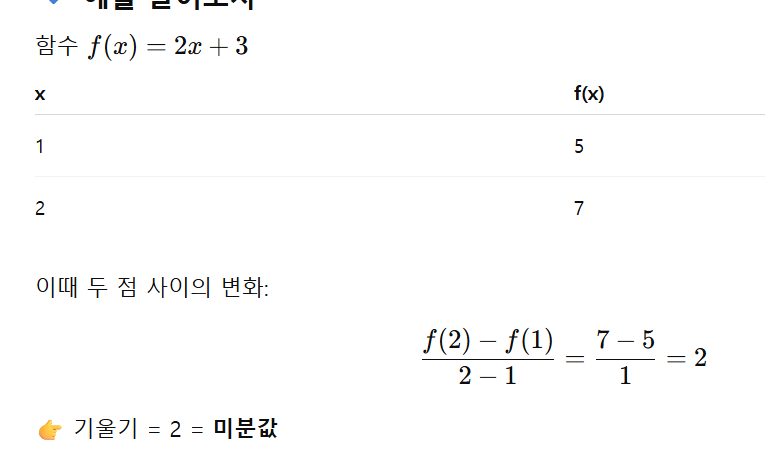

In [6]:
# y = Wx
# 비용함수 오차 (Wx - y)**2 / 2 수식을 미분 (Wx - y)*x 
# 공부시간 x 시험기간 y
# (3,7) W-old = 1.0 학습률 n = 0.1
# y-pred = 1.0 * 3
# 기울기 계산 (3.0 * 7) * 3 = -12.0
# 1.0 - (0.1 * -12.0) = 1.0 + 1.2 = 2.2

# (5,10)
# (11.0 - 10)*5 

epoch: 1 loss: 20.0771 w: -0.8168 b: -0.3270
epoch: 11 loss: 3.6227 w: 0.6805 b: 0.8772
epoch: 21 loss: 1.5549 w: 1.2451 b: 1.2741


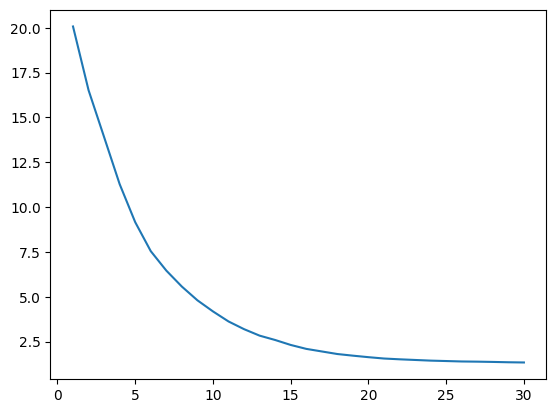

In [18]:
# epoch # 몇번 학습
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 2x + 1
X = 2*np.random.rand(100,1)
y = 2*X + 1 + np.random.randn(100,1) # 약간의 노이즈 추가

# SGD를 위한 초기값 셋팅
w = np.random.randn(1,1)  # 가중치(기울기)
b = np.random.randn(1,1)  # y 절편
learning_rate = 0.0005
n_epochs = 30
history = []  # 학습현황 기록
loss = []

# 학습 반복
for epoch in range(n_epochs):
    # epoch마다 데이터 샘플을 하나씩 학습
    for i in range(len(X)):
        random_idx = np.random.randint(len(X))
        xi = X[random_idx:random_idx + 1]
        yi = y[random_idx:random_idx + 1]
        # 예측 y-pred = Wx + b
        y_pred = xi.dot(w) + b

        # 오차 계산
        error = y_pred - yi

        # 수식적용 : 기울기 계산
        gradient_w = xi.T.dot(error)
        gradient_b = np.sum(error)

        # 수식적용 : 가중치 편향
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        history.append( ( w.copy()[0,0], b.copy()[0,0] ) ) # 시각화를 위해

    # epoch 단위로 결과 출력
    total_loss = np.mean( (X.dot(w) + b - y) **2 )
    loss.append(total_loss)
    if epoch % 10 == 0:
        print(f'epoch: {epoch + 1} loss: {total_loss:.4f} w: {w[0,0]:.4f} b: {b[0,0]:.4f}')

plt.plot(range(1, n_epochs + 1), loss)
